# **Bitter.db Data Preparation**

# Gameplan:

1. **Data Introduction**: Loading and preliminary exploration revealed the dataset's structure.
2. **Binary Transformation**: Columns with two unique values were seamlessly transformed to numeric format.
3.**Numeric Transition**: Non-numeric columns were systematically removed for a fully numeric representation.
4. **Missing Values Handling**: Rigorous identification and imputation using the median ensured data completeness.
5. **Feature Focus**: Unnecessary features were systematically dropped, streamlining the dataset.
6. **Key Feature Identification**: Utilizing a Random Forest classifier, influential features were pinpointed.
7. **Visual Insight**: Histograms and boxplots visually depicted feature characteristics.
8. **Data Export**: Two Excel files, encapsulating the prepared dataset and a normalized version, ready for further analysis.

In [1]:
import pandas as pd
from google.colab import files

In [2]:
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name, low_memory=False)

Saving Bitter.csv to Bitter.csv


In [30]:
# Display basic information about the DataFrame
info_df = pd.DataFrame({
    'Column': df.columns,
    'Non-null Count': df.count().values,
    'Data Type': df.dtypes.values
})

print("\nInformation about the dataset:")
display(info_df)


Information about the dataset:


,Column,Non-null Count,Data Type
0,Index,1528,object
1,Name,2057,object
2,PUBCHEM_COMPOUND_CID,1980,object
3,ACTIVITY,2075,object
4,ID,1396,object
...,...,...,...
305,SC_1,2074,float64
306,SC_2,2074,float64
307,SC_3_C,2074,float64
308,SC_3_CH,2074,float64



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Columns: 310 entries, Index to SC_3_P
dtypes: bool(1), float64(82), int64(192), object(35)
memory usage: 4.9+ MB


None


Summary Statistics for Numeric Columns:


,Frequency,ALogP98,ALogP98_Unknown,ES_Sum_aaaC,ES_Sum_aaCH,ES_Sum_aaN,ES_Sum_aaNH,ES_Sum_aaO,ES_Sum_aaS,ES_Sum_aasC,...,Kappa_2_AM,Kappa_3,Kappa_3_AM,PHI,SC_0,SC_1,SC_2,SC_3_C,SC_3_CH,SC_3_P
count,1528.0,2074.000000,2074.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,...,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000
mean,1.0,1.963849,0.036644,0.062817,3.634440,0.449053,0.052508,0.220668,0.023923,0.563807,...,5.698783,5.007059,4.492908,4.792347,14.308100,14.430569,18.829315,4.572806,0.009643,22.341369
std,0.0,1.995334,0.200356,0.388360,5.113806,1.798219,0.468336,1.111293,0.192800,1.601901,...,4.204547,4.140302,3.910648,3.898014,9.387158,10.276977,15.720478,5.342107,0.102565,22.543845
min,1.0,-24.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-47.474000,...,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.073750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.384270,2.493070,2.062140,2.639703,10.000000,9.000000,10.000000,2.000000,0.000000,10.000000
50%,1.0,2.074000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.905980,4.000000,3.446685,3.976895,12.000000,12.000000,15.000000,3.000000,0.000000,16.000000
75%,1.0,3.011250,0.000000,0.000000,7.054500,0.000000,0.000000,0.000000,0.000000,1.069500,...,7.086882,6.393018,5.862315,6.066800,16.750000,17.000000,22.000000,6.000000,0.000000,27.000000
max,1.0,22.258000,2.000000,4.855000,35.843000,21.678000,8.359000,10.961000,1.758000,13.481000,...,106.229000,91.331300,75.061700,89.578200,246.000000,252.000000,340.000000,82.000000,2.000000,398.000000


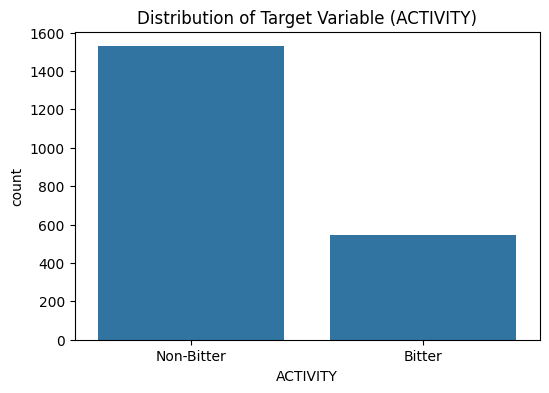

In [81]:
# Display basic information about the DataFrame
print("\nInformation about the dataset:")
display(df.info())

# Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
display(df.describe())

# Display the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='ACTIVITY', data=df)
plt.title('Distribution of Target Variable (ACTIVITY)')
plt.show()

In [31]:
# Make a copy of the DataFrame
df_copy = df.copy()

In [32]:
# Initialize a summary dictionary to store information about the actions taken
summary = {}

# Iterate through columns in the copied DataFrame
for column in df_copy.columns:
    # Check if the column has only 2 unique values
    if df_copy[column].nunique() == 2:
        # Convert the values to 1 and 0
        unique_values = df_copy[column].unique()
        df_copy[column] = df_copy[column].map({unique_values[0]: 0, unique_values[1]: 1}).astype(int)

        # Update the summary dictionary
        summary[column] = f"Converted values in '{column}' to 1 and 0 (as integers)."

# Display the summary of actions taken
print("\nSummary of Actions Taken:")
for action in summary.values():
    print(action)

# Display the updated DataFrame copy
print("\nUpdated DataFrame copy:")
display(df_copy.head())



Summary of Actions Taken:
Converted values in 'ACTIVITY' to 1 and 0 (as integers).
Converted values in 'ES_Sum_aasN' to 1 and 0 (as integers).
Converted values in 'ES_Sum_tCH' to 1 and 0 (as integers).
Converted values in 'ES_Count_aaS' to 1 and 0 (as integers).
Converted values in 'ES_Count_aasN' to 1 and 0 (as integers).
Converted values in 'ES_Count_dssS' to 1 and 0 (as integers).
Converted values in 'ES_Count_tCH' to 1 and 0 (as integers).
Converted values in 'CoordDimension' to 1 and 0 (as integers).
Converted values in 'IsChiral' to 1 and 0 (as integers).
Converted values in 'Num_SpiroAtoms' to 1 and 0 (as integers).
Converted values in 'Num_Rings4' to 1 and 0 (as integers).
Converted values in 'Num_Rings8' to 1 and 0 (as integers).
Converted values in 'Num_Fragments' to 1 and 0 (as integers).
Converted values in 'Num_ComplexedFragments' to 1 and 0 (as integers).
Converted values in 'Num_Isotopes' to 1 and 0 (as integers).
Converted values in 'Num_TrueAtropisomerCenters' to 1 an

,Index,Name,PUBCHEM_COMPOUND_CID,ACTIVITY,ID,NonBitterID,Smiles,Frequency,Canonical_Smiles,Standardize_Actions_Taken,...,Kappa_2_AM,Kappa_3,Kappa_3_AM,PHI,SC_0,SC_1,SC_2,SC_3_C,SC_3_CH,SC_3_P
0,1,7765,"7,765",0,NaN,1_Fnb,O(C([H])([H])C([H])([H])[H])C([H])(C([H])([H])...,1.0,CCOC(C)OCC,NaN,...,5.06450,5.00000,4.92000,5.01386,8.0,7.0,7.0,1.0,0.0,6.0
1,2,177,177,0,2_Fnb,2_Fnb,O=C([H])C([H])([H])[H],1.0,CC=O,NaN,...,1.67000,0.00000,0.00000,1.48630,3.0,2.0,1.0,0.0,0.0,0.0
2,3,62876,"62,876",0,3_Fnb,3_Fnb,O(C([H])(C([H])([H])[H])OC([H])([H])C([H])([H]...,1.0,CCCCOC(C)OCCc1ccccc1,StandardizeStereo\nStandardizeStereo_ChiralFlag,...,8.31033,7.05817,6.36993,6.85916,16.0,16.0,18.0,2.0,0.0,19.0
3,4,83036,"83,036",0,4_Fnb,4_Fnb,O(C([H])(C([H])([H])[H])OC([H])([H])C([H])([H]...,1.0,CC(C)CCOC(C)OCCC(C)C,NaN,...,8.24664,11.00000,10.92000,8.19952,14.0,13.0,15.0,3.0,0.0,12.0
4,5,108504,"108,504",0,5_Fnb,5_Fnb,O(C([H])([H])C([H])([H])C([H])=C([H])C([H])([H...,1.0,CCOC(C)OCCC=CCC,StandardizeStereo\nStandardizeStereo_ChiralFlag,...,8.75380,9.00000,8.65999,8.50578,12.0,11.0,11.0,1.0,0.0,10.0


In [33]:
# Initialize a summary dictionary to store information about the actions taken
summary = {}

# Identify columns with non-numeric data types in the copied DataFrame
non_numeric_columns = df_copy.select_dtypes(exclude=['number']).columns

# Iterate through non-numeric columns and drop them
for column in non_numeric_columns:
    df_copy.drop(column, axis=1, inplace=True)
    summary[column] = f"Dropped column '{column}' with text values."

# Display the summary of actions taken
print("\nSummary of Actions Taken:")
for action in summary.values():
    print(action)


Summary of Actions Taken:
Dropped column 'Index' with text values.
Dropped column 'Name' with text values.
Dropped column 'PUBCHEM_COMPOUND_CID' with text values.
Dropped column 'ID' with text values.
Dropped column 'NonBitterID' with text values.
Dropped column 'Smiles' with text values.
Dropped column 'Canonical_Smiles' with text values.
Dropped column 'Standardize_Actions_Taken' with text values.
Dropped column 'Apol' with text values.
Dropped column 'HasGasteigerCharges' with text values.
Dropped column 'Gasteiger_Charges' with text values.
Dropped column 'Molecular_Formula' with text values.
Dropped column 'Molecular_Composition' with text values.
Dropped column 'Molecular_Weight' with text values.
Dropped column 'Molecular_Mass' with text values.
Dropped column 'VSA_TotalArea' with text values.
Dropped column 'VSA_AtomicAreas' with text values.
Dropped column 'VSA_AlogP' with text values.
Dropped column 'VSA_MR' with text values.
Dropped column 'VSA_PartialCharge' with text valu

In [34]:
# Display information about each column in the DataFrame
column_info = pd.DataFrame({
    'Column': df_copy.columns,
    'Data Type': df_copy.dtypes.values,
    'Unique Values': [df_copy[col].nunique() for col in df_copy.columns],
    'Sample Values': [df_copy[col].sample(3).values for col in df_copy.columns],
})

print("\nInformation about each column in the DataFrame:")
display(column_info)



Information about each column in the DataFrame:


,Column,Data Type,Unique Values,Sample Values
0,ACTIVITY,int64,2,"[0, 1, 0]"
1,Frequency,float64,1,"[1.0, 1.0, 1.0]"
2,ALogP98,float64,1635,"[2.722, 3.704, 3.301]"
3,ALogP98_Unknown,float64,3,"[0.0, 0.0, 0.0]"
4,ES_Sum_aaaC,float64,58,"[0.0, 0.0, 0.0]"
...,...,...,...,...
270,SC_1,float64,57,"[7.0, 21.0, 12.0]"
271,SC_2,float64,83,"[25.0, 5.0, 11.0]"
272,SC_3_C,float64,36,"[7.0, 7.0, 3.0]"
273,SC_3_CH,float64,3,"[0.0, 0.0, 0.0]"


In [35]:
# Count missing values in each column and row
missing_values_column = df_copy.isnull().sum().sort_values(ascending=False)
missing_values_row = df_copy.isnull().sum(axis=1).sort_values(ascending=False)

# Display the sorted count of missing values in each column
print("\nCount of missing values in each column (sorted):")
display(missing_values_column[missing_values_column > 0])

# Display the sorted count of missing values in each row
print("\nCount of missing values in each row (sorted):")
display(missing_values_row[missing_values_row > 0])



Count of missing values in each column (sorted):


Frequency          547
SC_3_P               1
CHI_2                1
CHI_V_2              1
CHI_V_1              1
CHI_V_0              1
CHI_3_P              1
CHI_3_CH             1
CHI_3_C              1
CHI_1                1
CHI_V_3_CH           1
CHI_0                1
IC                   1
IAC_Total            1
IAC_Mean             1
CIC                  1
BIC                  1
CHI_V_3_C            1
SIC                  1
CHI_V_3_P            1
PHI                  1
JX                   1
ALogP98              1
ALogP98_Unknown      1
SC_3_CH              1
SC_2                 1
SC_1                 1
SC_0                 1
SC_3_C               1
Kappa_3_AM           1
Kappa_3              1
Kappa_2_AM           1
Kappa_2              1
Kappa_1_AM           1
Kappa_1              1
JY                   1
dtype: int64


Count of missing values in each row (sorted):


1415    35
2074     1
1707     1
1713     1
1712     1
        ..
1893     1
1892     1
1889     1
1894     1
1891     1
Length: 548, dtype: int64

In [36]:
# Get data types and their counts
data_types_counts = df_copy.dtypes.value_counts()

# Count NaN and missing values
nan_count = df_copy.isnull().sum().sum()

# Display data types and their counts
print("\nData Types and Their Counts:")
display(data_types_counts)

# Display count of NaN and missing values
print(f"\nCount of NaN and Missing Values: {nan_count}")



Data Types and Their Counts:


int64      195
float64     80
dtype: int64


Count of NaN and Missing Values: 582


In [37]:
# Display basic information about the DataFrame
info_df = pd.DataFrame({
    'Column': df_copy.columns,
    'Non-null Count': df_copy.count().values,
    'Data Type': df_copy.dtypes.values
})

print("\nInformation about the dataset:")
display(info_df)


Information about the dataset:


,Column,Non-null Count,Data Type
0,ACTIVITY,2075,int64
1,Frequency,1528,float64
2,ALogP98,2074,float64
3,ALogP98_Unknown,2074,float64
4,ES_Sum_aaaC,2075,float64
...,...,...,...
270,SC_1,2074,float64
271,SC_2,2074,float64
272,SC_3_C,2074,float64
273,SC_3_CH,2074,float64


In [42]:
# Make a copy of the DataFrame
df_imputed = df_copy.copy()

# Count the initial number of empty cells
initial_empty_cells = df_imputed.isnull().sum().sum()

# Impute missing values with the median of each column
df_imputed = df_imputed.fillna(df_imputed.median())

# Count the final number of empty cells after imputation
final_empty_cells = df_imputed.isnull().sum().sum()

# Display the count of empty cells before and after imputation
print(f"\nCount of Empty Cells Before Imputation: {initial_empty_cells}")
print(f"Count of Empty Cells After Imputation: {final_empty_cells}")

# Display the updated DataFrame with imputed values
print("\nDataFrame with Missing Values Imputed using Median:")
display(df_imputed.head())



Count of Empty Cells Before Imputation: 582
Count of Empty Cells After Imputation: 0

DataFrame with Missing Values Imputed using Median:


,ACTIVITY,Frequency,ALogP98,ALogP98_Unknown,ES_Sum_aaaC,ES_Sum_aaCH,ES_Sum_aaN,ES_Sum_aaNH,ES_Sum_aaO,ES_Sum_aaS,...,Kappa_2_AM,Kappa_3,Kappa_3_AM,PHI,SC_0,SC_1,SC_2,SC_3_C,SC_3_CH,SC_3_P
0,0,1.0,0.777,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,5.06450,5.00000,4.92000,5.01386,8.0,7.0,7.0,1.0,0.0,6.0
1,0,1.0,-0.183,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,1.67000,0.00000,0.00000,1.48630,3.0,2.0,1.0,0.0,0.0,0.0
2,0,1.0,3.313,0.0,0.0,10.366,0.0,0.0,0.0,0.0,...,8.31033,7.05817,6.36993,6.85916,16.0,16.0,18.0,2.0,0.0,19.0
3,0,1.0,3.240,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,8.24664,11.00000,10.92000,8.19952,14.0,13.0,15.0,3.0,0.0,12.0
4,0,1.0,2.225,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,8.75380,9.00000,8.65999,8.50578,12.0,11.0,11.0,1.0,0.0,10.0


In [55]:
# Make a copy of the DataFrame
df_filtered = df_imputed.copy()

# Get the initial number of rows and columns
initial_rows, initial_columns = df_filtered.shape

# Define the threshold for dropping columns (50%)
threshold_percentage = 50

# Iterate through columns in the DataFrame
for column in df_filtered.columns:
    # Check if the column has only one possible value
    if df_filtered[column].nunique() == 1:
        df_filtered.drop(column, axis=1, inplace=True)
        print(f"Dropped column '{column}' with only one possible value.")
    # Check if the column is binary (0 or 1)
    elif df_filtered[column].nunique() != 2:
        # Calculate the percentage of the most frequent value in the column
        most_frequent_percentage = df_filtered[column].value_counts().max() / len(df_filtered) * 100

        # Drop the column if the most frequent value percentage exceeds the threshold
        if most_frequent_percentage >= threshold_percentage:
            df_filtered.drop(column, axis=1, inplace=True)
            print(f"Dropped column '{column}' with {most_frequent_percentage:.2f}% of the same value.")

# Get the final number of rows and columns after dropping columns
final_rows, final_columns = df_filtered.shape

# Display a summary of the number of rows and columns before and after dropping columns
print(f"\nSummary of Rows and Columns:")
print(f"Initial number of rows: {initial_rows}, Initial number of columns: {initial_columns}")
print(f"Final number of rows: {final_rows}, Final number of columns: {final_columns}")

# Display the updated DataFrame after dropping columns
print("\nUpdated DataFrame after dropping columns:")
display(df_filtered.head())


Dropped column 'Frequency' with only one possible value.
Dropped column 'ALogP98_Unknown' with 96.58% of the same value.
Dropped column 'ES_Sum_aaaC' with 97.11% of the same value.
Dropped column 'ES_Sum_aaCH' with 56.43% of the same value.
Dropped column 'ES_Sum_aaN' with 92.92% of the same value.
Dropped column 'ES_Sum_aaNH' with 98.60% of the same value.
Dropped column 'ES_Sum_aaO' with 95.95% of the same value.
Dropped column 'ES_Sum_aaS' with 98.46% of the same value.
Dropped column 'ES_Sum_aasC' with 56.53% of the same value.
Dropped column 'ES_Sum_aaSe' with only one possible value.
Dropped column 'ES_Sum_dCH2' with 91.47% of the same value.
Dropped column 'ES_Sum_ddC' with 99.76% of the same value.
Dropped column 'ES_Sum_ddsN' with 98.55% of the same value.
Dropped column 'ES_Sum_ddssS' with 95.86% of the same value.
Dropped column 'ES_Sum_ddssSe' with only one possible value.
Dropped column 'ES_Sum_dNH' with 99.08% of the same value.
Dropped column 'ES_Sum_dS' with 98.75% of t

,ACTIVITY,ALogP98,ES_Sum_aasN,ES_Sum_dO,ES_Sum_dssC,ES_Sum_sCH3,ES_Sum_ssCH2,ES_Sum_tCH,ES_Count_aaS,ES_Count_aasN,...,Kappa_2,Kappa_2_AM,Kappa_3,Kappa_3_AM,PHI,SC_0,SC_1,SC_2,SC_3_C,SC_3_P
0,0,0.777,0,0.000,0.0,5.803,1.446,0,0,0,...,5.14285,5.06450,5.00000,4.92000,5.01386,8.0,7.0,7.0,1.0,6.0
1,0,-0.183,0,8.805,0.0,1.444,0.000,0,0,0,...,2.00000,1.67000,0.00000,0.00000,1.48630,3.0,2.0,1.0,0.0,0.0
2,0,3.313,0,0.000,0.0,4.116,4.727,0,0,0,...,9.07407,8.31033,7.05817,6.36993,6.85916,16.0,16.0,18.0,2.0,19.0
3,0,3.240,0,0.000,0.0,10.781,3.830,0,0,0,...,8.31999,8.24664,11.00000,10.92000,8.19952,14.0,13.0,15.0,3.0,12.0
4,0,2.225,0,0.000,0.0,6.017,3.537,0,0,0,...,9.09090,8.75380,9.00000,8.65999,8.50578,12.0,11.0,11.0,1.0,10.0


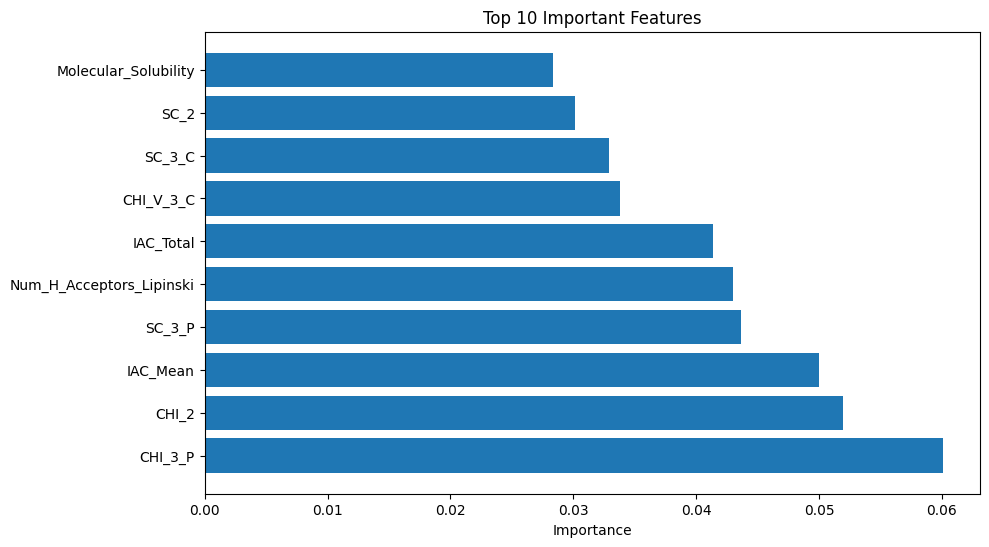


DataFrame with Selected Features:


,CHI_3_P,CHI_2,IAC_Mean,SC_3_P,Num_H_Acceptors_Lipinski,IAC_Total,CHI_V_3_C,SC_3_C,SC_2,Molecular_Solubility,ACTIVITY
0,1.56294,2.68252,1.24067,6.0,2,27.29480,0.09622,1.0,7.0,-0.883,0
1,0.00000,0.70710,1.37878,0.0,1,9.65148,0.00000,0.0,1.0,0.168,0
2,4.33451,6.03589,1.21081,19.0,2,46.01080,0.21407,2.0,18.0,-4.081,0
3,2.95679,5.75467,1.14115,12.0,2,45.64610,0.91272,3.0,15.0,-3.227,0
4,2.58195,4.09673,1.19819,10.0,2,38.34210,0.09622,1.0,11.0,-2.739,0


In [73]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Separate features (X) and target variable (y)
X = df_filtered.drop('ACTIVITY', axis=1)
y = df_filtered['ACTIVITY']

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.title(f'Top {top_n} Important Features')
plt.show()

# Select the top N features
selected_features = feature_importance_df['Feature'][:top_n].tolist()

# Create a DataFrame with only the selected features and the target variable
df_selected_features = df_filtered[selected_features + ['ACTIVITY']]

# Display the DataFrame with selected features
print("\nDataFrame with Selected Features:")
display(df_selected_features.head())


<Figure size 1500x1000 with 0 Axes>

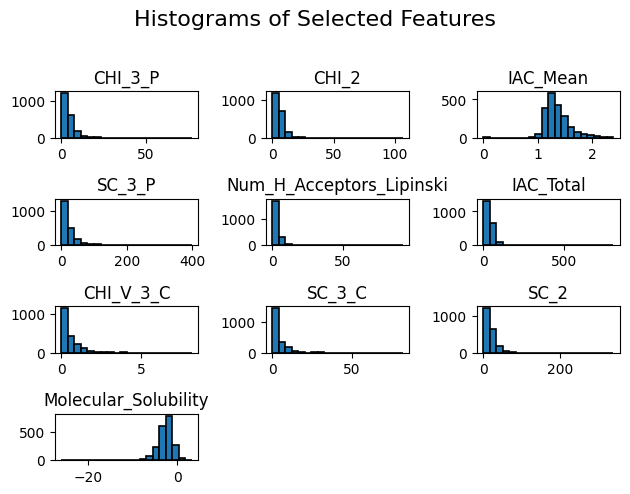

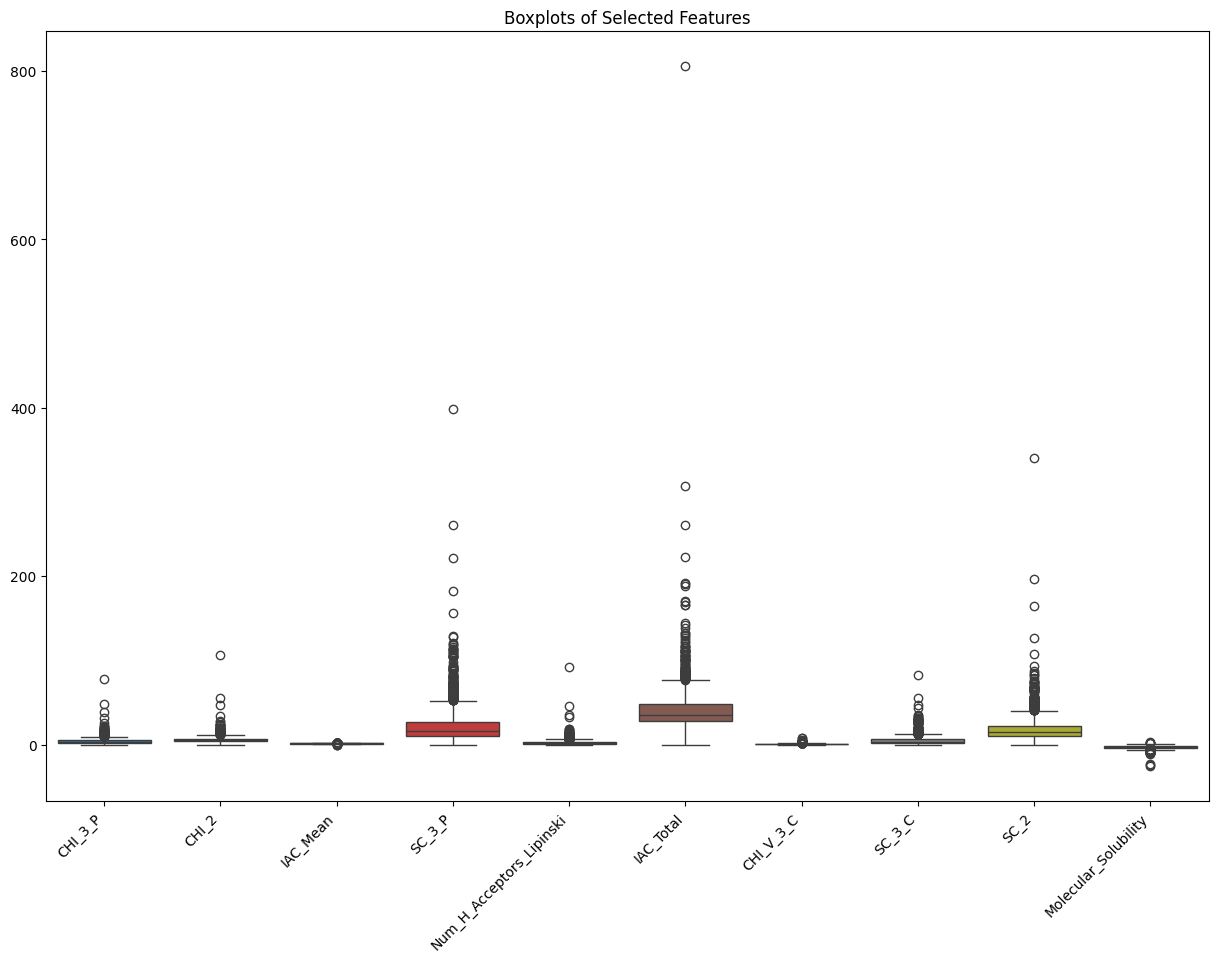

In [74]:
import seaborn as sns

# Display histograms for selected features
plt.figure(figsize=(15, 10))
df_selected_features.drop('ACTIVITY', axis=1).hist(bins=20, edgecolor='black', linewidth=1.2, grid=False)
plt.suptitle("Histograms of Selected Features", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Display boxplots for selected features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_selected_features.drop('ACTIVITY', axis=1))
plt.title("Boxplots of Selected Features")
plt.xticks(rotation=45, ha='right')
plt.show()


In [76]:
# Display information about each remaining feature
feature_info = df_selected_features.drop('ACTIVITY', axis=1).describe().transpose()

# Display frequency for binary features
binary_features = df_selected_features.columns[df_selected_features.nunique() == 2].tolist()
binary_feature_info = df_selected_features[binary_features].apply(pd.value_counts).transpose()

# Display the information about each feature
print("\nInformation about each remaining feature:")
display(feature_info)

# Display frequency for binary features
print("\nFrequency for Binary Features:")
display(binary_feature_info)



Information about each remaining feature:


,count,mean,std,min,25%,50%,75%,max
CHI_3_P,2075.0,4.388562,3.725786,0.000,2.380760,3.498865,5.21555,77.36410
CHI_2,2075.0,5.881821,4.299163,0.000,3.642530,4.924540,6.92629,106.17400
IAC_Mean,2075.0,1.357005,0.221556,0.000,1.207055,1.320250,1.46275,2.38793
SC_3_P,2075.0,22.338313,22.538839,0.000,10.000000,16.000000,27.00000,398.00000
Num_H_Acceptors_Lipinski,2075.0,2.905542,3.394042,0.000,1.000000,2.000000,3.00000,92.00000
IAC_Total,2075.0,41.461637,28.114732,0.000,27.932450,35.552100,47.53500,805.35200
CHI_V_3_C,2075.0,0.575390,0.689511,0.000,0.166660,0.341515,0.75378,8.17423
SC_3_C,2075.0,4.572048,5.340931,0.000,2.000000,3.000000,6.00000,82.00000
SC_2,2075.0,18.827470,15.716912,0.000,10.000000,15.000000,22.00000,340.00000
Molecular_Solubility,2075.0,-2.741884,1.884917,-26.068,-3.571000,-2.522000,-1.61950,3.23200



Frequency for Binary Features:


,0,1
ACTIVITY,1528,547


In [78]:
import numpy as np

df_selected_features.to_excel("raw_prepared_dataframe.xlsx", index=False)
normalized_df = (df_selected_features - df_selected_features.mean()) / df_selected_features.std()
normalized_df.to_excel("normalized_dataframe.xlsx", index=False)

from google.colab import files

files.download("raw_prepared_dataframe.xlsx")
files.download("normalized_dataframe.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>